## Implementation

# Data Understanding



Import Libraries
 

In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
import heapq
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


Reading data 

In [225]:
data = pd.read_csv("Data.csv",nrows=101)
data.head()

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score,Top_1,Top_2,Top_3
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,2.0,4.0,5.0,...,7.0,7.0,7.0,6.0,7.0,5.0,Green,10,7,13
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,8.0,7.0,8.0,6.0,9.0,Blue,6,7,13
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,5.0,7.0,7.0,9.0,6.0,7.0,Green,1,5,7
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,7.0,7.0,8.0,7.5,6.5,9.0,Blue,19,16,13
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,7.0,6.0,8.0,NaN,NaN,Green,7,9,13


In [226]:
data.dtypes

Id                     int64
Name                  object
Gender                object
Field                 object
Occupation            object
Age                    int64
Openness             float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Interface_1          float64
Interface_2          float64
Interface_3          float64
Interface_4          float64
Interface_5          float64
Interface_6          float64
Interface_7          float64
Interface_8          float64
Interface_9          float64
Interface_10         float64
Interface_11         float64
Interface_12         float64
Interface_13         float64
Interface_14         float64
Interface_15         float64
Interface_16         float64
Interface_17         float64
Interface_18         float64
Interface_19         float64
Test_Score            object
Top_1                  int64
Top_2                  int64
Top_3                  int64
dtype: object

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 101 non-null    int64  
 1   Name               101 non-null    object 
 2   Gender             101 non-null    object 
 3   Field              101 non-null    object 
 4   Occupation         101 non-null    object 
 5   Age                101 non-null    int64  
 6   Openness           101 non-null    float64
 7   Extraversion       101 non-null    float64
 8   Agreeableness      101 non-null    float64
 9   Conscientiousness  101 non-null    float64
 10  Neuroticism        101 non-null    float64
 11  Interface_1        101 non-null    float64
 12  Interface_2        101 non-null    float64
 13  Interface_3        101 non-null    float64
 14  Interface_4        101 non-null    float64
 15  Interface_5        101 non-null    float64
 16  Interface_6        101 non

In [228]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.000000
Name                 0.000000
Gender               0.000000
Field                0.000000
Occupation           0.000000
Age                  0.000000
Openness             0.000000
Extraversion         0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Neuroticism          0.000000
Interface_1          0.000000
Interface_2          0.000000
Interface_3          0.000000
Interface_4          0.000000
Interface_5          0.000000
Interface_6          0.000000
Interface_7          0.000000
Interface_8          0.000000
Interface_9          0.000000
Interface_10         0.000000
Interface_11         0.000000
Interface_12         0.000000
Interface_13         0.000000
Interface_14         0.000000
Interface_15         0.000000
Interface_16         0.000000
Interface_17         0.000000
Interface_18         5.940594
Interface_19         5.940594
Test_Score           0.000000
Top_1                0.000000
Top_2                0.000000
Top_3     

In [229]:
data['Interface_18'].fillna(value=data['Interface_18'].mean(), inplace=True)

In [230]:
data['Interface_19'].fillna(value=data['Interface_19'].mean(), inplace=True)


In [231]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.0
Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Interface_18         0.0
Interface_19         0.0
Test_Score           0.0
Top_1                0.0
Top_2                0.0
Top_3                0.0
dtype: float64

In [232]:
data['Test_Score'] .unique()

array(['Green', 'Blue', 'Gold', 'Orange'], dtype=object)

In [233]:
data.describe()


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,...,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Top_1,Top_2,Top_3
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,51.000000,22.138614,4.029703,3.396040,3.574257,2.628713,3.381188,6.945545,6.175248,6.063366,...,7.400990,6.688119,6.707921,7.103960,7.874257,6.280000,6.233684,9.504950,10.702970,10.712871
std,29.300171,5.964947,0.821041,1.211026,0.901072,1.392217,1.227087,1.721774,1.882520,1.925499,...,1.939304,2.143422,2.174014,1.655773,1.871077,2.085215,2.069426,4.744731,5.214489,5.486960
min,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,2.300000,1.000000,1.000000,1.000000,1.800000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,26.000000,20.000000,4.000000,3.000000,3.000000,1.000000,3.000000,6.000000,5.000000,5.000000,...,6.000000,6.000000,6.000000,6.000000,7.000000,5.000000,5.000000,7.000000,7.000000,7.000000
50%,51.000000,21.000000,4.000000,3.000000,4.000000,2.000000,4.000000,7.000000,6.000000,6.000000,...,8.000000,7.000000,7.000000,7.000000,8.000000,6.280000,6.500000,10.000000,11.000000,11.000000
75%,76.000000,21.000000,5.000000,4.000000,4.000000,4.000000,4.000000,8.000000,7.000000,7.000000,...,9.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,13.000000,15.000000,16.000000
max,101.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.000000,19.000000,19.000000


In [234]:
data.value_counts('Test_Score')

Test_Score
Blue      29
Gold      27
Orange    27
Green     18
dtype: int64

# Statistical analysis

In [235]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap='Pastel1')

,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Top_1,Top_2,Top_3
Id,1.000000,-0.090000,0.040000,0.020000,0.130000,-0.190000,0.090000,0.040000,0.000000,-0.050000,0.150000,-0.090000,-0.060000,-0.100000,0.060000,0.030000,0.180000,-0.010000,-0.010000,0.030000,-0.090000,-0.060000,-0.080000,-0.000000,0.110000,0.090000,0.050000,-0.010000,-0.050000
Age,-0.090000,1.000000,0.010000,0.180000,0.190000,0.220000,0.030000,0.070000,0.050000,0.040000,0.130000,0.030000,0.110000,-0.010000,0.040000,0.040000,-0.090000,-0.020000,0.030000,0.040000,0.150000,0.170000,0.080000,-0.040000,0.130000,0.030000,0.020000,0.080000,0.030000
Openness,0.040000,0.010000,1.000000,0.240000,0.080000,0.140000,-0.070000,-0.040000,-0.000000,-0.000000,0.080000,0.230000,0.080000,0.070000,0.070000,-0.040000,0.140000,-0.010000,0.020000,0.130000,0.060000,0.000000,0.120000,0.040000,0.060000,-0.000000,0.090000,-0.110000,-0.070000
Extraversion,0.020000,0.180000,0.240000,1.000000,0.130000,0.080000,-0.080000,-0.040000,0.120000,0.060000,0.210000,0.080000,0.040000,-0.020000,-0.090000,-0.020000,-0.030000,0.080000,0.020000,0.030000,0.060000,0.040000,0.190000,-0.060000,0.110000,-0.140000,-0.060000,0.060000,0.040000
Agreeableness,0.130000,0.190000,0.080000,0.130000,1.000000,0.100000,0.160000,0.070000,0.080000,0.040000,0.070000,0.030000,-0.020000,-0.080000,-0.030000,0.090000,-0.190000,0.010000,0.020000,-0.020000,0.010000,0.040000,0.060000,-0.020000,0.070000,-0.030000,-0.030000,-0.130000,-0.010000
Conscientiousness,-0.190000,0.220000,0.140000,0.080000,0.100000,1.000000,0.010000,0.130000,0.120000,0.020000,-0.000000,0.020000,0.050000,-0.010000,-0.030000,0.060000,-0.050000,0.180000,-0.040000,0.120000,0.110000,0.010000,0.080000,0.120000,-0.050000,-0.010000,-0.050000,0.040000,0.100000
Neuroticism,0.090000,0.030000,-0.070000,-0.080000,0.160000,0.010000,1.000000,0.240000,0.160000,0.210000,0.180000,0.180000,0.070000,0.060000,-0.010000,0.120000,0.220000,0.120000,0.170000,0.130000,0.000000,0.020000,0.030000,0.030000,0.120000,0.080000,-0.180000,-0.180000,0.040000
Interface_1,0.040000,0.070000,-0.040000,-0.040000,0.070000,0.130000,0.240000,1.000000,0.720000,0.750000,0.440000,0.470000,0.170000,0.130000,0.040000,0.060000,0.160000,0.520000,0.390000,0.200000,0.190000,0.310000,0.200000,0.340000,0.290000,0.250000,-0.350000,-0.340000,-0.250000
Interface_2,0.000000,0.050000,-0.000000,0.120000,0.080000,0.120000,0.160000,0.720000,1.000000,0.750000,0.440000,0.390000,0.240000,0.260000,0.200000,0.210000,0.190000,0.410000,0.350000,0.250000,0.210000,0.300000,0.240000,0.300000,0.360000,0.210000,-0.400000,-0.340000,-0.130000
Interface_3,-0.050000,0.040000,-0.000000,0.060000,0.040000,0.020000,0.210000,0.750000,0.750000,1.000000,0.330000,0.360000,0.270000,0.210000,0.080000,0.100000,0.220000,0.460000,0.350000,0.180000,0.200000,0.310000,0.190000,0.320000,0.320000,0.200000,-0.350000,-0.240000,-0.240000


# get dynamic the highest and lowest interfaces along all the personalities

In [236]:
data_1= data[data.columns[11:31]]


In [237]:
means_Green = np.mean(data_1[data_1['Test_Score']=='Green'], axis=0)  
green_Array = []
green_Array.extend(means_Green)
highest_green = heapq.nlargest(4, means_Green)
lowest_green = heapq.nsmallest(4, means_Green)


means_Blue = np.mean(data_1[data_1['Test_Score']=='Blue'], axis=0)  
blue_Array = []
blue_Array.extend(means_Blue)
highest_blue = heapq.nlargest(4, means_Blue)
lowest_blue = heapq.nsmallest(4, means_Blue)



means_Gold= np.mean(data_1[data_1['Test_Score']=='Gold'], axis=0)  
gold_Array = []
gold_Array.extend(means_Gold)
highest_gold = heapq.nlargest(4, means_Gold)
lowest_gold = heapq.nsmallest(4, means_Gold)



means_Orange = np.mean(data_1[data_1['Test_Score']=='Orange'], axis=0)  
orange_Array = []
orange_Array.extend(means_Orange)
highest_orange = heapq.nlargest(4, means_Orange)
lowest_orange = heapq.nsmallest(4, means_Orange)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [238]:
def get_index(array1,array2,full_array):
    high1,high2,high3,high4=array1
    low1,low2,low3,low4=array2
    index_high1=full_array.index(high1)
    index_high2=full_array.index(high2)
    index_high3=full_array.index(high3)
    index_high4=full_array.index(high4)
    index_low1=full_array.index(low1)
    index_low2=full_array.index(low2)
    index_low3=full_array.index(low3)
    index_low4=full_array.index(low4)
    return index_high1,index_high2,index_high3,index_high4,index_low1,index_low2,index_low3,index_low4

In [239]:
Green_values=get_index(highest_green,lowest_green,green_Array)
Blue_values=get_index(highest_blue,lowest_blue,blue_Array)
Gold_values=get_index(highest_gold,lowest_gold,gold_Array)
Orange_values=get_index(highest_orange,lowest_orange,orange_Array)
Orange_values


(9, 16, 10, 0, 8, 7, 11, 17)

In [240]:
selected_green = [*Green_values]
selected_blue = [*Blue_values]
selected_gold = [*Gold_values]
selected_orange = [*Orange_values]

In [241]:
def Union(lst1, lst2, lst3 , lst4):
    final_list = list(set(lst1) | set(lst2) | set(lst3)  | set(lst4))
    return final_list
selected_factors=Union(selected_green,selected_blue,selected_gold,selected_orange) 

In [242]:
All_factors = [*selected_factors]
selected_interfaces = data_1.iloc[:, All_factors]


In [243]:
Interfaces=selected_interfaces

In [244]:
def convert_values(column):
    return column.apply(lambda x: 1 if x >= 6 else 0)

for column in Interfaces.columns:
    Interfaces[column] = convert_values(Interfaces[column])


C:\Users\HP\AppData\Local\Temp\ipykernel_19744\3814709719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interfaces[column] = convert_values(Interfaces[column])


In [245]:
Interfaces['Test_Score']=data_1.iloc[:,-1]


C:\Users\HP\AppData\Local\Temp\ipykernel_19744\2089764425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interfaces['Test_Score']=data_1.iloc[:,-1]


# Machine learning using All interfaces

In [246]:
New=data[data.columns[6:31]]
New['Test_Score'] = pd.factorize(New['Test_Score'])[0]



C:\Users\HP\AppData\Local\Temp\ipykernel_19744\4037034807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New['Test_Score'] = pd.factorize(New['Test_Score'])[0]


In [247]:
y = New['Test_Score']
y
x = New.drop(['Test_Score'],axis = 1)
x
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)


In [248]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100


23.809523809523807

In [249]:
knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)
accuracy_score(y_test, y_pred_KNN)*100

33.33333333333333

In [250]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test,y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


38.095238095238095

In [251]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


28.57142857142857
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.25      0.75      0.38         4
           3       0.50      0.50      0.50         6

    accuracy                           0.29        21
   macro avg       0.19      0.31      0.22        21
weighted avg       0.19      0.29      0.21        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [252]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


28.57142857142857
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      0.29      0.31         7
           2       0.25      0.50      0.33         4
           3       0.33      0.33      0.33         6

    accuracy                           0.29        21
   macro avg       0.23      0.28      0.24        21
weighted avg       0.25      0.29      0.26        21



# Array of personality in 1s and 0s

In [253]:
y=np.full([len(Interfaces['Test_Score']),4],[0,0,0,0])
y1=np.array(y)
for Classes in range(len(Interfaces['Test_Score'])):
    if Interfaces['Test_Score'][Classes]=='Green':
        y1[Classes][0]=1
    elif Interfaces['Test_Score'][Classes] == 'Blue':
        y1[Classes][1]=1
    elif Interfaces['Test_Score'][Classes] == 'Gold':
        y1[Classes][2]=1    
    else:
        y1[Classes][3]=1


In [254]:
y=y1
x=Interfaces[Interfaces.columns[:13]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)

y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

21.25
acc of KNN %  14.285714285714285
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.29      0.44         7
           2       0.00      0.00      0.00         4
           3       0.50      0.17      0.25         6

   micro avg       0.60      0.14      0.23        21
   macro avg       0.38      0.11      0.17        21
weighted avg       0.48      0.14      0.22        21
 samples avg       0.14      0.14      0.14        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [255]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


14.285714285714285
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.14      0.22         7
           2       0.33      0.25      0.29         4
           3       0.20      0.17      0.18         6

   micro avg       0.30      0.14      0.19        21
   macro avg       0.26      0.14      0.17        21
weighted avg       0.29      0.14      0.18        21
 samples avg       0.14      0.14      0.14        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
# svc=svm.SVC()
# model_svc= svc.fit(x_train, y_train)
# y_pred_svc= model_svc.predict(x_test)
# print(accuracy_score(y_test, y_pred_svc)*100)
# print("F-score",classification_report(y_test, y_pred_svc))


# GReen

In [257]:
dummy_df = pd.get_dummies(Interfaces, columns=['Test_Score'])

In [258]:
Green_data=dummy_df

In [259]:
Green_data = Green_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Orange"],axis=1)


In [260]:
y=Green_data['Test_Score_Green'].values
x=Green_data[Green_data.columns[:13]].values

In [261]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [262]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)
print("F-score",classification_report(y_test, y_pred_tree))



71.42857142857143
F-score               precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.00      0.00      0.00         4

    accuracy                           0.71        21
   macro avg       0.39      0.44      0.42        21
weighted avg       0.64      0.71      0.67        21



In [263]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


85.0
acc of KNN %  80.95238095238095
F-score               precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       0.00      0.00      0.00         4

    accuracy                           0.81        21
   macro avg       0.40      0.50      0.45        21
weighted avg       0.66      0.81      0.72        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [264]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

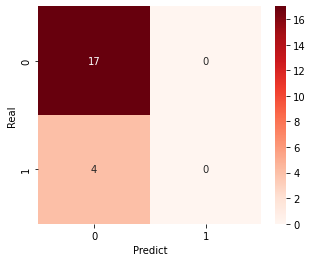

In [265]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [266]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))



F-score               precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.00      0.00      0.00         4

    accuracy                           0.76        21
   macro avg       0.40      0.47      0.43        21
weighted avg       0.65      0.76      0.70        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [267]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


80.95238095238095
F-score               precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       0.00      0.00      0.00         4

    accuracy                           0.81        21
   macro avg       0.40      0.50      0.45        21
weighted avg       0.66      0.81      0.72        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [268]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


80.95238095238095
F-score               precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       0.00      0.00      0.00         4

    accuracy                           0.81        21
   macro avg       0.40      0.50      0.45        21
weighted avg       0.66      0.81      0.72        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Blue 

In [269]:
Blue_data= dummy_df

In [270]:
Blue_data = Blue_data.drop(["Test_Score_Green","Test_Score_Gold","Test_Score_Orange"],axis=1)


In [271]:
y=Blue_data['Test_Score_Blue'].values
x=Blue_data[Blue_data.columns[:13]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [272]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)
print("F-score",classification_report(y_test, y_pred_tree))


66.66666666666666
F-score               precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.50      0.43      0.46         7

    accuracy                           0.67        21
   macro avg       0.62      0.61      0.61        21
weighted avg       0.66      0.67      0.66        21



In [273]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)

y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

75.0
acc of KNN %  76.19047619047619
F-score               precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.29      0.44         7

    accuracy                           0.76        21
   macro avg       0.87      0.64      0.65        21
weighted avg       0.82      0.76      0.71        21



In [274]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,1,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,0
7,1,0
8,0,0
9,1,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

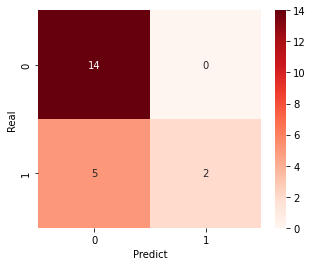

In [275]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [276]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.65      0.79      0.71        14
           1       0.25      0.14      0.18         7

    accuracy                           0.57        21
   macro avg       0.45      0.46      0.45        21
weighted avg       0.51      0.57      0.53        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [277]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


66.66666666666666
F-score               precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [278]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


71.42857142857143
F-score               precision    recall  f1-score   support

           0       0.72      0.93      0.81        14
           1       0.67      0.29      0.40         7

    accuracy                           0.71        21
   macro avg       0.69      0.61      0.61        21
weighted avg       0.70      0.71      0.68        21



# GOld

In [279]:
Gold_data= dummy_df

In [280]:
Gold_data = Gold_data.drop(["Test_Score_Blue","Test_Score_Green","Test_Score_Orange"],axis=1)
Gold_data

,Interface_1,Interface_2,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score_Gold
0,1,1,0,1,1,1,1,1,1,1,1,1,0,0
1,1,1,1,0,0,1,1,1,1,1,1,1,1,0
2,1,1,1,1,0,1,1,1,1,1,1,1,1,0
3,1,0,0,0,0,0,1,1,1,1,1,1,1,0
4,0,0,1,0,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,1,1,1,1,0,0,1,1,1,0,0,0
97,1,1,1,0,0,1,1,0,1,1,1,1,1,0
98,1,1,1,0,0,1,1,1,1,1,0,1,1,1
99,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [281]:
y=Gold_data['Test_Score_Gold'].values
x=Gold_data[Gold_data.columns[:13]].values
x

array([[1, 1, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [282]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

In [283]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)



71.42857142857143


In [284]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

78.75
76.19047619047619
F-score               precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.00      0.00      0.00         4

    accuracy                           0.76        21
   macro avg       0.40      0.47      0.43        21
weighted avg       0.65      0.76      0.70        21



In [285]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

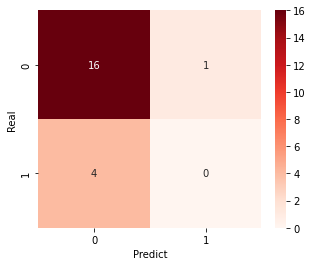

In [286]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [287]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


76.19047619047619

In [288]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


80.95238095238095
F-score               precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       0.00      0.00      0.00         4

    accuracy                           0.81        21
   macro avg       0.40      0.50      0.45        21
weighted avg       0.66      0.81      0.72        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [289]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


71.42857142857143
F-score               precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.25      0.25      0.25         4

    accuracy                           0.71        21
   macro avg       0.54      0.54      0.54        21
weighted avg       0.71      0.71      0.71        21



# Orange

In [290]:
Orange_data= dummy_df

In [291]:
Orange_data = Orange_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Green"],axis=1)
Orange_data

,Interface_1,Interface_2,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score_Orange
0,1,1,0,1,1,1,1,1,1,1,1,1,0,0
1,1,1,1,0,0,1,1,1,1,1,1,1,1,0
2,1,1,1,1,0,1,1,1,1,1,1,1,1,0
3,1,0,0,0,0,0,1,1,1,1,1,1,1,0
4,0,0,1,0,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,1,1,1,1,0,0,1,1,1,0,0,0
97,1,1,1,0,0,1,1,0,1,1,1,1,1,0
98,1,1,1,0,0,1,1,1,1,1,0,1,1,0
99,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [292]:
y=Orange_data['Test_Score_Orange'].values
x=Orange_data[Orange_data.columns[:13]].values

In [293]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [294]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

66.66666666666666

In [295]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

In [296]:
knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)

In [297]:
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)

y_pred_KNN = knn_model.predict(x_test)


print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

80.0
71.42857142857143
acc of KNN %  71.42857142857143
F-score               precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.50      0.17      0.25         6

    accuracy                           0.71        21
   macro avg       0.62      0.55      0.54        21
weighted avg       0.67      0.71      0.66        21



In [298]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,1,0
6,0,0
7,0,0
8,0,0
9,0,1


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Actual')]

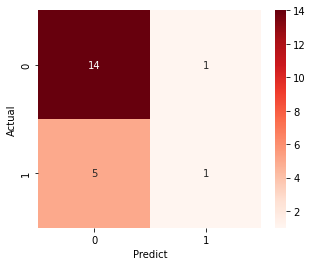

In [299]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Actual")

In [300]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
print(accuracy_score(y_test, y_pred_networks)*100)
print("F-score",classification_report(y_test, y_pred_networks))


61.904761904761905
F-score               precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.33      0.33      0.33         6

    accuracy                           0.62        21
   macro avg       0.53      0.53      0.53        21
weighted avg       0.62      0.62      0.62        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [301]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


71.42857142857143
F-score               precision    recall  f1-score   support

           0       0.71      1.00      0.83        15
           1       0.00      0.00      0.00         6

    accuracy                           0.71        21
   macro avg       0.36      0.50      0.42        21
weighted avg       0.51      0.71      0.60        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [302]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


66.66666666666666
F-score               precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.33      0.17      0.22         6

    accuracy                           0.67        21
   macro avg       0.53      0.52      0.51        21
weighted avg       0.61      0.67      0.63        21



# Vector
 all interfaces in one array 

In [303]:
y=New['Test_Score']
x=Interfaces[Interfaces.columns[:13]].values

In [304]:
Y= y
X=x



In [305]:
Y= y
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
weights = {0:0.19,1:0.26,2:0.31,3:0.25}
tree=DecisionTreeClassifier(class_weight=weights)
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)
print("F-score",classification_report(y_test, y_pred_tree))


28.57142857142857
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      0.43      0.43         7
           2       0.17      0.25      0.20         4
           3       0.29      0.33      0.31         6

    accuracy                           0.29        21
   macro avg       0.22      0.25      0.23        21
weighted avg       0.26      0.29      0.27        21



[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

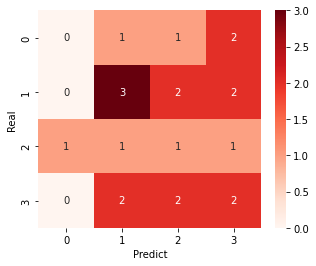

In [306]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [307]:
x = Interfaces[Interfaces.columns[:13]].values
x
Y= y1
X=x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))



47.5
acc of KNN %  28.57142857142857
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.75      0.43      0.55         7
           2       0.14      0.25      0.18         4
           3       0.33      0.33      0.33         6

    accuracy                           0.29        21
   macro avg       0.31      0.25      0.27        21
weighted avg       0.37      0.29      0.31        21



In [308]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
26,1,1
86,1,1
2,0,3
55,1,1
75,3,2
94,3,2
16,1,2
73,1,2
54,0,3
96,1,3


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

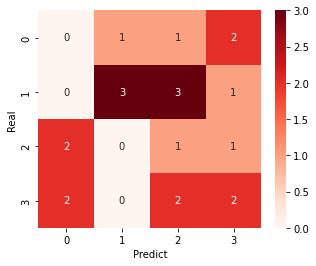

In [309]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [310]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
print(mlpc.score(x_train,y_train)*100)

accuracy_score(y_test, y_pred_networks)*100

11.25


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


14.285714285714285

In [311]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
# svc=svm.SVC()
# model_svc= svc.fit(x_train, y_train)
# y_pred_svc= model_svc.predict(x_test)
# print(accuracy_score(y_test, y_pred_svc)*100)
# print("F-score",classification_report(y_test, y_pred_svc))



In [312]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19.047619047619047
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      0.29      0.40         7
           2       0.50      0.25      0.33         4
           3       0.17      0.17      0.17         6

   micro avg       0.36      0.19      0.25        21
   macro avg       0.33      0.18      0.23        21
weighted avg       0.37      0.19      0.24        21
 samples avg       0.19      0.19      0.19        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 8 Interfaces to KNN

In [313]:
means_Green = np.mean(data_1[data_1['Test_Score']=='Green'], axis=0)  
green_Array = []
green_Array.extend(means_Green)
highest_green = heapq.nlargest(3, means_Green)
lowest_green = heapq.nsmallest(3, means_Green)


means_Blue = np.mean(data_1[data_1['Test_Score']=='Blue'], axis=0)  
blue_Array = []
blue_Array.extend(means_Blue)
highest_blue = heapq.nlargest(3, means_Blue)
lowest_blue = heapq.nsmallest(3, means_Blue)



means_Gold= np.mean(data_1[data_1['Test_Score']=='Gold'], axis=0)  
gold_Array = []
gold_Array.extend(means_Gold)
highest_gold = heapq.nlargest(3, means_Gold)
lowest_gold = heapq.nsmallest(3, means_Gold)



means_Orange = np.mean(data_1[data_1['Test_Score']=='Orange'], axis=0)  
orange_Array = []
orange_Array.extend(means_Orange)
highest_orange = heapq.nlargest(3, means_Orange)
lowest_orange = heapq.nsmallest(3, means_Orange)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [314]:
def get_index(array1,array2,full_array):
    high1,high2,high3=array1
    low1,low2,low3=array2
    index_high1=full_array.index(high1)
    index_high2=full_array.index(high2)
    index_high3=full_array.index(high3)
    index_low1=full_array.index(low1)
    index_low2=full_array.index(low2)
    index_low3=full_array.index(low3)
    return index_high1,index_high2,index_high3,index_low1,index_low2,index_low3

In [315]:
Green_values=get_index(highest_green,lowest_green,green_Array)
Blue_values=get_index(highest_blue,lowest_blue,blue_Array)
Gold_values=get_index(highest_gold,lowest_gold,gold_Array)
Orange_values=get_index(highest_orange,lowest_orange,orange_Array)
selected_green = [*Green_values]
selected_blue = [*Blue_values]
selected_gold = [*Gold_values]
selected_orange = [*Orange_values]

In [316]:
def Union(lst1, lst2, lst3 , lst4):
    final_list = list(set(lst1) | set(lst2) | set(lst3)  | set(lst4))
    return final_list
selected_factors=Union(selected_green,selected_blue,selected_gold,selected_orange) 

In [317]:
selected_factors

[5, 7, 8, 9, 10, 11, 12, 16]

In [318]:
All_factors = [*selected_factors]
New_factors = data_1.iloc[:, All_factors]
# New_factors['Test_Score']=data_1.iloc[:,-1]


In [319]:

for column in New_factors.columns:
    New_factors[column] = convert_values(New_factors[column])


C:\Users\HP\AppData\Local\Temp\ipykernel_19744\1415960429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_factors[column] = convert_values(New_factors[column])


In [320]:
Factors=New_factors
Factors

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17
0,0,1,1,1,1,1,1,1
1,1,0,0,1,1,1,1,1
2,1,1,0,1,1,1,1,1
3,0,0,0,0,1,1,1,1
4,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
96,1,1,1,1,0,0,1,1
97,1,0,0,1,1,0,1,1
98,1,0,0,1,1,1,1,0
99,1,1,1,1,1,1,1,1


In [321]:
Factors['Test_Score']=data_1.iloc[:,-1]


C:\Users\HP\AppData\Local\Temp\ipykernel_19744\2639090068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Factors['Test_Score']=data_1.iloc[:,-1]


In [322]:
x = Factors[Factors.columns[:8]].values
Y= y1
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


22.5
acc of KNN %  9.523809523809524
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.50      0.33      0.40         6

   micro avg       0.25      0.10      0.14        21
   macro avg       0.12      0.08      0.10        21
weighted avg       0.14      0.10      0.11        21
 samples avg       0.10      0.10      0.10        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [323]:
# from sklearn.metrics import confusion_matrix

# m_c = confusion_matrix(y_test, y_pred_KNN)
# plt.figure(figsize=(5, 4))
# sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [324]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
# svc=svm.SVC()
# model_svc= svc.fit(x_train, y_train)
# y_pred_svc= model_svc.predict(x_test)
# print(accuracy_score(y_test, y_pred_svc)*100)
# print("F-score",classification_report(y_test, y_pred_svc))


In [325]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


19.047619047619047
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.40      0.29      0.33         7
           2       0.00      0.00      0.00         4
           3       0.40      0.33      0.36         6

   micro avg       0.22      0.19      0.21        21
   macro avg       0.20      0.15      0.17        21
weighted avg       0.25      0.19      0.22        21
 samples avg       0.19      0.19      0.19        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model per personality highest 3

# GReen

In [326]:
dummy_df = pd.get_dummies(Factors, columns=['Test_Score'])

In [327]:
Green_data=dummy_df
Green_data

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,0,1,1,1,1,1,1,1,0,0,1,0
1,1,0,0,1,1,1,1,1,1,0,0,0
2,1,1,0,1,1,1,1,1,0,0,1,0
3,0,0,0,0,1,1,1,1,1,0,0,0
4,1,0,1,1,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,1,1,1,0,0,1,1,1,0,0,0
97,1,0,0,1,1,0,1,1,1,0,0,0
98,1,0,0,1,1,1,1,0,0,1,0,0
99,1,1,1,1,1,1,1,1,1,0,0,0


In [328]:
Green_data = Green_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Orange"],axis=1)



In [329]:
y=Green_data['Test_Score_Green'].values
x=Green_data[Green_data.columns[:8]].values

In [330]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [331]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 
print("F-score",classification_report(y_test, y_pred_tree))



76.19047619047619
F-score               precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.33      0.25      0.29         4

    accuracy                           0.76        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.74      0.76      0.75        21



In [332]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


80.0
acc of KNN %  76.19047619047619
F-score               precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.00      0.00      0.00         4

    accuracy                           0.76        21
   macro avg       0.40      0.47      0.43        21
weighted avg       0.65      0.76      0.70        21



In [333]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,0
9,0,1


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

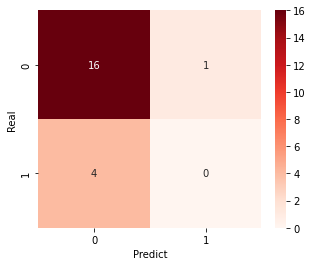

In [334]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [335]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.00      0.00      0.00         4

    accuracy                           0.71        21
   macro avg       0.39      0.44      0.42        21
weighted avg       0.64      0.71      0.67        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [336]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


76.19047619047619
F-score               precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.33      0.25      0.29         4

    accuracy                           0.76        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.74      0.76      0.75        21



In [337]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


80.95238095238095
F-score               precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       0.00      0.00      0.00         4

    accuracy                           0.81        21
   macro avg       0.40      0.50      0.45        21
weighted avg       0.66      0.81      0.72        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

# Orange

In [338]:
Orange_data=dummy_df
Orange_data

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,0,1,1,1,1,1,1,1,0,0,1,0
1,1,0,0,1,1,1,1,1,1,0,0,0
2,1,1,0,1,1,1,1,1,0,0,1,0
3,0,0,0,0,1,1,1,1,1,0,0,0
4,1,0,1,1,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,1,1,1,0,0,1,1,1,0,0,0
97,1,0,0,1,1,0,1,1,1,0,0,0
98,1,0,0,1,1,1,1,0,0,1,0,0
99,1,1,1,1,1,1,1,1,1,0,0,0


In [339]:
Orange_data = Orange_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Green"],axis=1)



In [340]:
y=Orange_data['Test_Score_Orange'].values
x=Orange_data[Orange_data.columns[:8]].values

In [341]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [342]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 
print("F-score",classification_report(y_test, y_pred_tree))



71.42857142857143
F-score               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.50      0.33      0.40         6

    accuracy                           0.71        21
   macro avg       0.63      0.60      0.61        21
weighted avg       0.69      0.71      0.69        21



In [343]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


77.5
acc of KNN %  71.42857142857143
F-score               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.50      0.33      0.40         6

    accuracy                           0.71        21
   macro avg       0.63      0.60      0.61        21
weighted avg       0.69      0.71      0.69        21



In [344]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,1,1
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

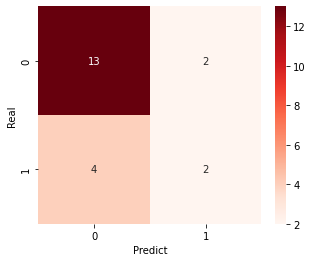

In [345]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [346]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.50      0.33      0.40         6

    accuracy                           0.71        21
   macro avg       0.63      0.60      0.61        21
weighted avg       0.69      0.71      0.69        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [347]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


71.42857142857143
F-score               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.50      0.33      0.40         6

    accuracy                           0.71        21
   macro avg       0.63      0.60      0.61        21
weighted avg       0.69      0.71      0.69        21



# Blue

In [348]:
Blue_data=dummy_df
Blue_data

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,0,1,1,1,1,1,1,1,0,0,1,0
1,1,0,0,1,1,1,1,1,1,0,0,0
2,1,1,0,1,1,1,1,1,0,0,1,0
3,0,0,0,0,1,1,1,1,1,0,0,0
4,1,0,1,1,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,1,1,1,0,0,1,1,1,0,0,0
97,1,0,0,1,1,0,1,1,1,0,0,0
98,1,0,0,1,1,1,1,0,0,1,0,0
99,1,1,1,1,1,1,1,1,1,0,0,0


In [349]:
Blue_data = Blue_data.drop(["Test_Score_Green","Test_Score_Gold","Test_Score_Orange"],axis=1)



In [350]:
y=Blue_data['Test_Score_Blue'].values
x=Blue_data[Blue_data.columns[:8]].values

In [351]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [352]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 
print("F-score",classification_report(y_test, y_pred_tree))



57.14285714285714
F-score               precision    recall  f1-score   support

           0       0.63      0.86      0.73        14
           1       0.00      0.00      0.00         7

    accuracy                           0.57        21
   macro avg       0.32      0.43      0.36        21
weighted avg       0.42      0.57      0.48        21



In [353]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


72.5
acc of KNN %  52.38095238095239
F-score               precision    recall  f1-score   support

           0       0.61      0.79      0.69        14
           1       0.00      0.00      0.00         7

    accuracy                           0.52        21
   macro avg       0.31      0.39      0.34        21
weighted avg       0.41      0.52      0.46        21



In [354]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
5,0,0
6,1,0
7,1,0
8,0,0
9,1,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

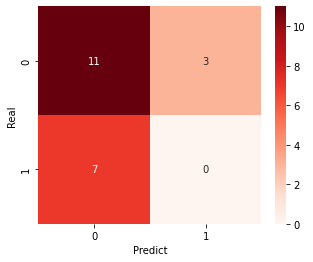

In [355]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [356]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.61      0.79      0.69        14
           1       0.00      0.00      0.00         7

    accuracy                           0.52        21
   macro avg       0.31      0.39      0.34        21
weighted avg       0.41      0.52      0.46        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [357]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


57.14285714285714
F-score               precision    recall  f1-score   support

           0       0.63      0.86      0.73        14
           1       0.00      0.00      0.00         7

    accuracy                           0.57        21
   macro avg       0.32      0.43      0.36        21
weighted avg       0.42      0.57      0.48        21



# Gold

In [358]:
Gold_data=dummy_df
Gold_data

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,0,1,1,1,1,1,1,1,0,0,1,0
1,1,0,0,1,1,1,1,1,1,0,0,0
2,1,1,0,1,1,1,1,1,0,0,1,0
3,0,0,0,0,1,1,1,1,1,0,0,0
4,1,0,1,1,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,1,1,1,0,0,1,1,1,0,0,0
97,1,0,0,1,1,0,1,1,1,0,0,0
98,1,0,0,1,1,1,1,0,0,1,0,0
99,1,1,1,1,1,1,1,1,1,0,0,0


In [359]:
Gold_data = Gold_data.drop(["Test_Score_Blue","Test_Score_Green","Test_Score_Orange"],axis=1)



In [360]:
y=Gold_data['Test_Score_Gold'].values
x=Gold_data[Gold_data.columns[:8]].values

In [361]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [362]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 
print("F-score",classification_report(y_test, y_pred_tree))



57.14285714285714
F-score               precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       0.00      0.00      0.00         4

    accuracy                           0.57        21
   macro avg       0.38      0.35      0.36        21
weighted avg       0.61      0.57      0.59        21



In [363]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


76.25
acc of KNN %  80.95238095238095
F-score               precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       0.00      0.00      0.00         4

    accuracy                           0.81        21
   macro avg       0.40      0.50      0.45        21
weighted avg       0.66      0.81      0.72        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [364]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

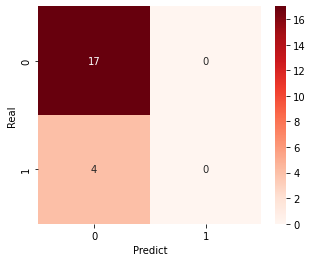

In [365]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [366]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.71      0.59      0.65        17
           1       0.00      0.00      0.00         4

    accuracy                           0.48        21
   macro avg       0.36      0.29      0.32        21
weighted avg       0.58      0.48      0.52        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [367]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


57.14285714285714
F-score               precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       0.00      0.00      0.00         4

    accuracy                           0.57        21
   macro avg       0.38      0.35      0.36        21
weighted avg       0.61      0.57      0.59        21

